# Experiments with Arnoldi iterations

In [1]:
# import 
import numpy as np
from prettytable import PrettyTable
from arnoldi_iteration import arnoldi_iteration,chope_lastrow,QR_algorithm,func_ ,func_2
from arnoldi_norm import arnoldi_norm 

## convergence rates (as absolute errors |ν−λ|) as a function of the number of iterations

In [2]:

#Ritz values  λ , exact eigenvalues ν

def arnoldi_convergence(λ,ν,n):
    n = n-1 
    errs = np.zeros((n+1, ), dtype='float')
    for i in range(n,0,-1):
        errs[i] = abs(ν[i] - λ[i])
        
        
    
    return errs 
# utility function for display    
def table(c_norm,t_norm,i_conv):
    A = PrettyTable()
    
    A.add_row(['Computed matrix norm ‖A‖₂', c_norm])
    A.add_row(["True norm ‖A‖₂",t_norm])
    A.add_row(["Iterative convergence",i_conv])
    
    print(A)   

In [3]:
# loading the matrices
M1 = np.loadtxt('../CGD/data/M1.txt')
x0_m1 = np.loadtxt('../CGD/data/x0_m1.txt')

M2 = np.loadtxt('../CGD/data/M2.txt')
x0_m2 = np.loadtxt('../CGD/data/x0_m2.txt')

M3 = np.loadtxt('../CGD/data/M3.txt')
x0_m3 = np.loadtxt('../CGD/data/x0_m3.txt')

M4 = np.loadtxt('../CGD/data/M4.txt')
x0_m4 = np.loadtxt('../CGD/data/x0_m4.txt')

M5 = np.loadtxt('../CGD/data/M5.txt')
x0_m5 = np.loadtxt('../CGD/data/x0_m5.txt')

# M1 - Matrix Test

In [178]:
print("############# Test-1 ############")
prod = func_(M1)
    
# Initialize the Arnoldi algorithm.
arnoldi_norm_m1 = arnoldi_norm(prod,x0_m1,100) 
    
# Run the algorithm.
matrix_norm_m1,Iterative_convergence_m1 , λ_m1 = arnoldi_norm_m1.arnoldi_norm() 

true_norm = np.sqrt(np.linalg.norm(prod, ord=2))
table(matrix_norm_m1,true_norm,Iterative_convergence_m1)    



############# Test-1 ############
+---------------------------+-------------------+
|          Field 1          |      Field 2      |
+---------------------------+-------------------+
| Computed matrix norm ‖A‖₂ | 99.99999999999973 |
|       True norm ‖A‖₂      |  99.9999999999999 |
|   Iterative convergence   |         21        |
+---------------------------+-------------------+


In [179]:
%%timeit -r 10
# Measuring running time
arnoldi_norm_m1.arnoldi_norm()

744 ms ± 26 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [180]:
%%timeit -r 10
# Measuring running time
np.sqrt(np.linalg.norm(prod, ord=2))

306 ms ± 6.43 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


## M1 - Arnoldi convergence rates 

In [181]:
# Ritz values λ for n diffrent values 
H_50 = arnoldi_iteration(prod, x0_m1, 50)
λ_50 = list( QR_algorithm(H_50))
# n = 20
H_20 = arnoldi_iteration(prod, x0_m1, 20)
λ_20 = list( QR_algorithm(H_20))
# n = 10
H_10 = arnoldi_iteration(prod, x0_m1, 10)
λ_10 = list( QR_algorithm(H_10))
# n = 5
H_5 = arnoldi_iteration(prod, x0_m1, 5)
λ_5 = list( QR_algorithm(H_5))

In [182]:
# exact eigenvalues ν 
from numpy.linalg import eig
ν,w =eig(prod)
ν = list(ν.real)
ν_50 = ν[:50]
ν_20 = ν[:20]
ν_10 = ν[:10]
ν_5 = ν[:5]

In [184]:
#Ritz values λ vs exact eigenvalues ν for n 20
# λ_20 ,ν_20

In [59]:
# run arnoldi_convergence function 
errors_m1_n50 = list(arnoldi_convergence(λ_50,ν_50,50))
errors_m1_n20 = list(arnoldi_convergence(λ_20,ν_20,20)) 
errors_m1_n10 = list(arnoldi_convergence(λ_10,ν_10,10))
errors_m1_n5 = list(arnoldi_convergence(λ_5,ν_5,5))


In [60]:
# sort 
errors_m1_n50.sort(reverse=True)
errors_m1_n20.sort(reverse=True)
errors_m1_n10.sort(reverse=True)
errors_m1_n5.sort(reverse=True)

In [96]:
#errors_m1_n20

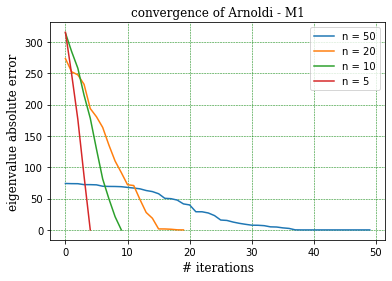

<Figure size 432x288 with 0 Axes>

In [62]:
import matplotlib.pyplot as plt
import numpy as np
font1 = {'family':'serif','color':'black','size':12}

xpoints = list(range(0,len(errors_m1_n50)))
ypoints = errors_m1_n50
xpoints2 = list(range(0,len(errors_m1_n20)))
ypoints2 = errors_m1_n20
xpoints3 = list(range(0,len(errors_m1_n10)))
ypoints3 = errors_m1_n10
xpoints4 = list(range(0,len(errors_m1_n5)))
ypoints4 = errors_m1_n5
#plt.ticklabel_format(style='sci',scilimits=(-3,4),axis='y')
plt.plot(xpoints, ypoints,label = "n = 50")
plt.plot(xpoints2, ypoints2,label = "n = 20")
plt.plot(xpoints3, ypoints3,label = "n = 10")
plt.plot(xpoints4, ypoints4,label = "n = 5")
#plt.yscale('symlog', linthreshy=0.01)
plt.legend()
plt.title("convergence of Arnoldi - M1", fontdict = font1,loc = 'center')
plt.xlabel("# iterations", fontdict = font1)
plt.ylabel("eigenvalue absolute error", fontdict = font1)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()
plt.savefig('M1.png')


# M2 - Matrix Test

In [67]:
print("############# Test-2 ############")
prod = func_2(M2)
    
# Initialize the Arnoldi algorithm.
arnoldi_norm_m2 = arnoldi_norm(prod,x0_m2,20) 
    
# Run the algorithm.
matrix_norm_m2,Iterative_convergence_m2 , λ_m2 = arnoldi_norm_m2.arnoldi_norm() 
    
true_norm = np.sqrt(np.linalg.norm(prod, ord=2))
table(matrix_norm_m2,true_norm,Iterative_convergence_m2) 

############# Test-2 ############
+---------------------------+--------------------+
|          Field 1          |      Field 2       |
+---------------------------+--------------------+
| Computed matrix norm ‖A‖₂ | 41.06642652181129  |
|       True norm ‖A‖₂      | 41.199155173994356 |
|   Iterative convergence   |         19         |
+---------------------------+--------------------+


In [12]:
%%timeit -r 10
# Measuring running time
arnoldi_norm_m2.arnoldi_norm()

907 ms ± 6.96 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [13]:
%%timeit -r 10
# Measuring running time
np.sqrt(np.linalg.norm(prod, ord=2))

797 µs ± 10.7 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)


In [ ]:
## M2 - Arnoldi convergence rates 

In [68]:
# Ritz values λ for n diffrent values 
#H_50 = arnoldi_iteration(prod, x0_m2, 30)
#λ_50 = list( QR_algorithm(H_50))
# n = 20
H_20 = arnoldi_iteration(prod, x0_m2, 20)
λ_20 = list( QR_algorithm(H_20))
# n = 10
H_10 = arnoldi_iteration(prod, x0_m2, 10)
λ_10 = list( QR_algorithm(H_10))
# n = 5
H_5 = arnoldi_iteration(prod, x0_m2, 5)
λ_5 = list( QR_algorithm(H_5))

In [69]:
# exact eigenvalues ν 
from numpy.linalg import eig
ν,w =eig(prod)
ν = list(ν.real)
ν_30 = ν[:30]
ν_20 = ν[:20]
ν_10 = ν[:10]
ν_5 = ν[:5]

In [70]:
# run arnoldi_convergence function 
#errors_m2_n30 = list(arnoldi_convergence(λ_50,ν_50,30))
errors_m2_n20 = list(arnoldi_convergence(λ_20,ν_20,20)) 
errors_m2_n10 = list(arnoldi_convergence(λ_10,ν_10,10))
errors_m2_n5 = list(arnoldi_convergence(λ_5,ν_5,5))


In [71]:
# sort 
#errors_m2_n50.sort(reverse=True)
errors_m2_n20.sort(reverse=True)
errors_m2_n10.sort(reverse=True)
errors_m2_n5.sort(reverse=True)

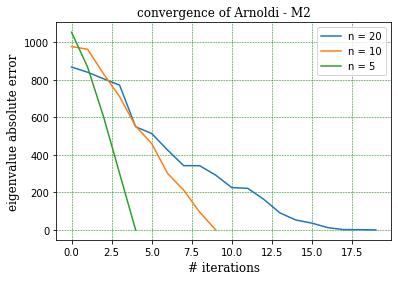

<Figure size 432x288 with 0 Axes>

In [72]:
import matplotlib.pyplot as plt
import numpy as np
font1 = {'family':'serif','color':'black','size':12}

xpoints = list(range(0,len(errors_m2_n20)))
ypoints = errors_m2_n20
xpoints2 = list(range(0,len(errors_m2_n10)))
ypoints2 = errors_m2_n10
xpoints3 = list(range(0,len(errors_m2_n5)))
ypoints3 = errors_m2_n5
#plt.ticklabel_format(style='sci',scilimits=(-3,4),axis='y')
plt.plot(xpoints, ypoints,label = "n = 20")
plt.plot(xpoints2, ypoints2,label = "n = 10")
plt.plot(xpoints3, ypoints3,label = "n = 5")
#plt.yscale('symlog', linthreshy=0.01)
plt.legend()
plt.title("convergence of Arnoldi - M2", fontdict = font1,loc = 'center')
plt.xlabel("# iterations", fontdict = font1)
plt.ylabel("eigenvalue absolute error", fontdict = font1)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()
plt.savefig('M2.png')

## M3 - Matrix Test

In [22]:
print("############# Test-3 ############")
prod = func_2(M3)
    
# Initialize the Arnoldi algorithm.
arnoldi_norm_m3 = arnoldi_norm(prod,x0_m3,100) 
    
# Run the algorithm.
matrix_norm_m3,Iterative_convergence_m3 , λ_m3 = arnoldi_norm_m3.arnoldi_norm() 
    
true_norm = np.sqrt(np.linalg.norm(prod, ord=2))
table(matrix_norm_m3,true_norm,Iterative_convergence_m3)     


############# Test-3 ############
+---------------------------+--------------------+
|          Field 1          |      Field 2       |
+---------------------------+--------------------+
| Computed matrix norm ‖A‖₂ |  41.4574385130684  |
|       True norm ‖A‖₂      | 41.457438513063735 |
|   Iterative convergence   |         34         |
+---------------------------+--------------------+


In [23]:
%%timeit -r 10
# Measuring running time
arnoldi_norm_m3.arnoldi_norm()

2.38 s ± 23.2 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [24]:
%%timeit -r 10
# Measuring running time
np.sqrt(np.linalg.norm(prod, ord=2))

181 ms ± 9.7 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


## M3 - Arnoldi convergence rates 

In [25]:
# Ritz values λ for n diffrent values 
H_50 = arnoldi_iteration(prod, x0_m3, 50)
λ_50 = list(QR_algorithm(H_50))
# n = 20
H_20 = arnoldi_iteration(prod, x0_m3, 20)
λ_20 = list(QR_algorithm(H_20))
# n = 10
H_10 = arnoldi_iteration(prod, x0_m3, 10)
λ_10 = list(QR_algorithm(H_10))
# n = 5
H_5 = arnoldi_iteration(prod, x0_m3, 5)
λ_5 = list(QR_algorithm(H_5))

In [26]:
# exact eigenvalues ν 
from numpy.linalg import eig
ν,w =eig(prod) 
ν = list(ν.real)
ν_50 = ν[:50]
ν_20 = ν[:20]
ν_10 = ν[:10]
ν_5 = ν[:5]


In [73]:
# run arnoldi_convergence function 
errors_m3_n50 = list(arnoldi_convergence(λ_50,ν_50,50))
errors_m3_n20 = list(arnoldi_convergence(λ_20,ν_20,20)) 
errors_m3_n10 = list(arnoldi_convergence(λ_10,ν_10,10))
errors_m3_n5 = list(arnoldi_convergence(λ_5,ν_5,5))

In [74]:
errors_m3_n50.sort(reverse=True)
errors_m3_n20.sort(reverse=True)
errors_m3_n10.sort(reverse=True)
errors_m3_n5.sort(reverse=True)

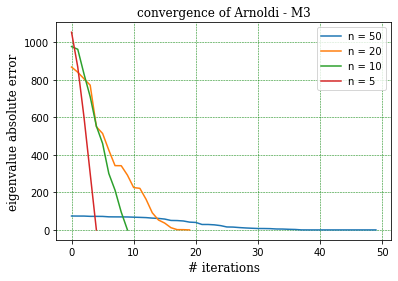

<Figure size 432x288 with 0 Axes>

In [75]:
import matplotlib.pyplot as plt
import numpy as np
font1 = {'family':'serif','color':'black','size':12}

xpoints = list(range(0,len(errors_m3_n50)))
ypoints = errors_m3_n50
xpoints2 = list(range(0,len(errors_m3_n20)))
ypoints2 = errors_m3_n20
xpoints3 = list(range(0,len(errors_m3_n10)))
ypoints3 = errors_m3_n10
xpoints4 = list(range(0,len(errors_m3_n5)))
ypoints4 = errors_m3_n5
#plt.ticklabel_format(style='sci',scilimits=(-3,4),axis='y')
plt.plot(xpoints, ypoints,label = "n = 50")
plt.plot(xpoints2, ypoints2,label = "n = 20")
plt.plot(xpoints3, ypoints3,label = "n = 10")
plt.plot(xpoints4, ypoints4,label = "n = 5")
#plt.yscale('symlog', linthreshy=0.01)
#plt.yscale('log')
plt.legend()
plt.title("convergence of Arnoldi - M3", fontdict = font1,loc = 'center')
plt.xlabel("# iterations", fontdict = font1)
plt.ylabel("eigenvalue absolute error", fontdict = font1)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()
plt.savefig('M3.png')

M4 - Matrix Test

In [76]:
print("############# Test-4 ############")
prod = func_(M4)
    
# Initialize the Arnoldi algorithm.
arnoldi_norm_m4 = arnoldi_norm(prod,x0_m4,100) 
    
# Run the algorithm.
matrix_norm_m4,Iterative_convergence_m4 , λ_m4 = arnoldi_norm_m4.arnoldi_norm() 

    
true_norm = np.sqrt(np.linalg.norm(prod, ord=2))
table(matrix_norm_m4,true_norm,Iterative_convergence_m4)

############# Test-4 ############
+---------------------------+--------------------+
|          Field 1          |      Field 2       |
+---------------------------+--------------------+
| Computed matrix norm ‖A‖₂ | 20.13959571512265  |
|       True norm ‖A‖₂      | 20.139595715129648 |
|   Iterative convergence   |         19         |
+---------------------------+--------------------+


In [31]:
%%timeit -r 10
# Measuring running time
arnoldi_norm_m4.arnoldi_norm()

383 ms ± 800 µs per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [32]:
%%timeit -r 10
# Measuring running time
np.sqrt(np.linalg.norm(prod, ord=2))

762 µs ± 34.3 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)


In [77]:
# Ritz values λ for n diffrent values 
H_50 = arnoldi_iteration(prod, x0_m4, 50)
λ_50 = list(QR_algorithm(H_50))
# n = 20
H_20 = arnoldi_iteration(prod, x0_m4, 20)
λ_20 = list(QR_algorithm(H_20))
# n = 10
H_10 = arnoldi_iteration(prod, x0_m4, 10)
λ_10 = list(QR_algorithm(H_10))
# n = 5
H_5 = arnoldi_iteration(prod, x0_m4, 5)
λ_5 = list(QR_algorithm(H_5))

In [78]:
# exact eigenvalues ν 
from numpy.linalg import eig
ν,w =eig(prod) 
ν = list(ν.real)
ν_50 = ν[:50]
ν_20 = ν[:20]
ν_10 = ν[:10]
ν_5 = ν[:5]


In [79]:
# run arnoldi_convergence function 
errors_m4_n50 = list(arnoldi_convergence(λ_50,ν_50,50))
errors_m4_n20 = list(arnoldi_convergence(λ_20,ν_20,20)) 
errors_m4_n10 = list(arnoldi_convergence(λ_10,ν_10,10))
errors_m4_n5 = list(arnoldi_convergence(λ_5,ν_5,5))

In [80]:
errors_m4_n50.sort(reverse=True)
errors_m4_n20.sort(reverse=True)
errors_m4_n10.sort(reverse=True)
errors_m4_n5.sort(reverse=True)

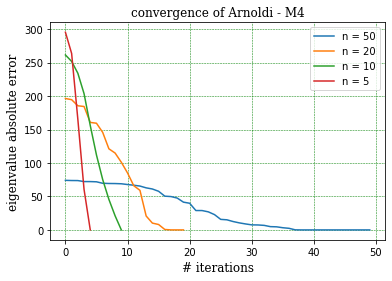

<Figure size 432x288 with 0 Axes>

In [81]:
import matplotlib.pyplot as plt
import numpy as np
font1 = {'family':'serif','color':'black','size':12}

xpoints = list(range(0,len(errors_m4_n50)))
ypoints = errors_m4_n50
xpoints2 = list(range(0,len(errors_m4_n20)))
ypoints2 = errors_m4_n20
xpoints3 = list(range(0,len(errors_m4_n10)))
ypoints3 = errors_m4_n10
xpoints4 = list(range(0,len(errors_m4_n5)))
ypoints4 = errors_m4_n5
#plt.ticklabel_format(style='sci',scilimits=(-3,4),axis='y')
plt.plot(xpoints, ypoints,label = "n = 50")
plt.plot(xpoints2, ypoints2,label = "n = 20")
plt.plot(xpoints3, ypoints3,label = "n = 10")
plt.plot(xpoints4, ypoints4,label = "n = 5")
#plt.yscale('symlog', linthreshy=0.01)
#plt.yscale('log')
plt.legend()
plt.title("convergence of Arnoldi - M4", fontdict = font1,loc = 'center')
plt.xlabel("# iterations", fontdict = font1)
plt.ylabel("eigenvalue absolute error", fontdict = font1)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()
plt.savefig('M4.png')


## M5 - Matrix Test

In [49]:
print("############# Test-5 ############")
prod = func_2(M5)
    
# Initialize the Arnoldi algorithm.
arnoldi_norm_m5 = arnoldi_norm(prod,x0_m5,30) 
    
# Run the algorithm.
matrix_norm_m5,Iterative_convergence_m5 , λ_m5 = arnoldi_norm_m5.arnoldi_norm() 

    
true_norm = np.sqrt(np.linalg.norm(prod, ord=2))
table(matrix_norm_m5,true_norm,Iterative_convergence_m5)

############# Test-5 ############
+---------------------------+-------------------+
|          Field 1          |      Field 2      |
+---------------------------+-------------------+
| Computed matrix norm ‖A‖₂ | 22.61928410153118 |
|       True norm ‖A‖₂      | 22.61927388568159 |
|   Iterative convergence   |         29        |
+---------------------------+-------------------+


In [50]:
%%timeit -r 10
# Measuring running time
arnoldi_norm_m5.arnoldi_norm()

3.64 s ± 71.9 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [51]:
%%timeit -r 10
# Measuring running time
np.sqrt(np.linalg.norm(prod, ord=2))

1.13 ms ± 91.6 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)


## M5 - Arnoldi convergence rates 

In [53]:
# Ritz values λ for n diffrent values 
H_30 = arnoldi_iteration(prod, x0_m5, 30)
λ_30 = list( QR_algorithm(H_50))
# n = 30
H_20 = arnoldi_iteration(prod, x0_m5, 20)
λ_20 = list( QR_algorithm(H_20))
# n = 10
H_10 = arnoldi_iteration(prod, x0_m5, 10)
λ_10 = list( QR_algorithm(H_10))
# n = 5
H_5 = arnoldi_iteration(prod, x0_m5, 5)
λ_5 = list( QR_algorithm(H_5))

In [54]:
# exact eigenvalues ν 
from numpy.linalg import eig
ν,w =eig(prod) 
ν = list(ν.real)
ν_30 = ν[:30]
ν_20 = ν[:20]
ν_10 = ν[:10]
ν_5 = ν[:5]


In [55]:
# run arnoldi_convergence function 
errors_m5_n30 = list(arnoldi_convergence(λ_30,ν_30,30))
errors_m5_n20 = list(arnoldi_convergence(λ_20,ν_20,20)) 
errors_m5_n10 = list(arnoldi_convergence(λ_10,ν_10,10))
errors_m5_n5 = list(arnoldi_convergence(λ_5,ν_5,5))

In [56]:
errors_m5_n30.sort(reverse=True)
errors_m5_n20.sort(reverse=True)
errors_m5_n10.sort(reverse=True)
errors_m5_n5.sort(reverse=True)

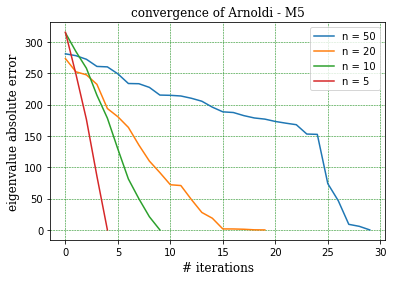

<Figure size 432x288 with 0 Axes>

In [82]:
import matplotlib.pyplot as plt
import numpy as np
font1 = {'family':'serif','color':'black','size':12}

xpoints = list(range(0,len(errors_m5_n30)))
ypoints = errors_m5_n30
xpoints2 = list(range(0,len(errors_m5_n20)))
ypoints2 = errors_m5_n20
xpoints3 = list(range(0,len(errors_m5_n10)))
ypoints3 = errors_m5_n10
xpoints4 = list(range(0,len(errors_m5_n5)))
ypoints4 = errors_m5_n5
#plt.ticklabel_format(style='sci',scilimits=(-3,4),axis='y')
plt.plot(xpoints, ypoints,label = "n = 50")
plt.plot(xpoints2, ypoints2,label = "n = 20")
plt.plot(xpoints3, ypoints3,label = "n = 10")
plt.plot(xpoints4, ypoints4,label = "n = 5")
#plt.yscale('symlog', linthreshy=0.01)
#plt.yscale('log')
plt.legend()
plt.title("convergence of Arnoldi - M5", fontdict = font1,loc = 'center')
plt.xlabel("# iterations", fontdict = font1)
plt.ylabel("eigenvalue absolute error", fontdict = font1)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()
plt.savefig('M5.png')